### Model Training

##### Importing Modules

In [1]:
from src.utils import notebook_utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

##### Data Loading

In [3]:
df = pd.read_csv("data_files/train.csv")
sample_df = df.sample(30000, random_state=20)

percentage_cls0 = sample_df[utils.TARGET_COL].value_counts()[0] / 50000
percentage_cls1 = sample_df[utils.TARGET_COL].value_counts()[1] / 50000

print("NAN count:\n", sample_df.isnull().sum())
print("Duplicate rows count:", sample_df.duplicated().sum())
print("Distribution:\n", sample_df[utils.TARGET_COL].value_counts())
print("% of non-duplicate: {} \n% of duplicate: {}".format(percentage_cls0, percentage_cls1))
del percentage_cls0, percentage_cls1

sample_df.head()

NAN count:
 id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64
Duplicate rows count: 0
Distribution:
 is_duplicate
0               18826
1               11174
dtype: int64
% of non-duplicate: 0.37652 
% of duplicate: 0.22348


,id,qid1,qid2,question1,question2,is_duplicate
339915,339915,467607,467608,Why should we follow rules?,"The ""ignore all rules"" paradox technically can...",0
229460,229460,45421,338768,Will you help a guy dress up as a girl?,How do I convince a guy to dress up as a girl?,0
163414,163414,254183,130279,What are the best sites to download English TV...,What are the best TV shows of 2016?,0
317156,317156,442314,442315,How do I calculate the cooling capacity of air...,Why is my air conditioner blowing but not cool...,0
235077,235077,195424,7057,What changes a female body undergoes after loo...,Does the female body undergo changes after los...,1


#### EDA & Feature Engineering

##### EDA

Null and duplicate count is 0. The classes are imbalanced.

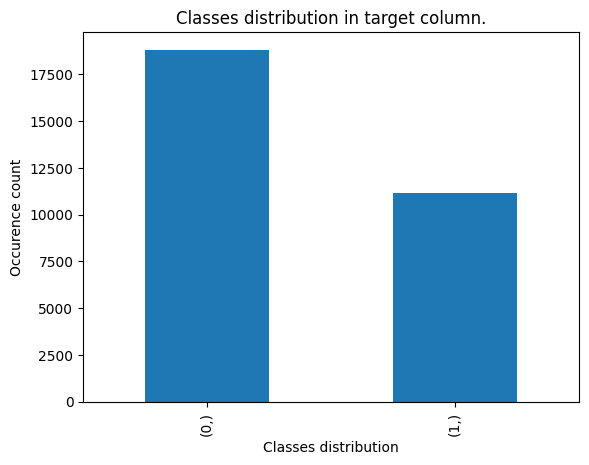

In [4]:
# plotting
sample_df[utils.TARGET_COL].value_counts().plot.bar()
plt.xlabel("Classes distribution")
plt.ylabel("Occurence count")
plt.title("Classes distribution in target column.")
plt.show()

##### Feature Engineering

In [6]:
feature_engineer = utils.FeatureEngineer(sample_df)
sample_df = feature_engineer.add_features()
sample_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,ques1_len,ques2_len,ques1_word_count,ques2_word_count,...,ques1_stopwords_ratio,ques2_stopwords_ratio,cmn_tokens_cnt_min,cmn_tokens_cnt_max,cmn_words_cnt_min,cmn_words_cnt_max,cmn_stopwords_cnt_min,cmn_stopwords_cnt_max,last_word_equal,first_word_equal
339915,339915,467607,467608,Why should we follow rules?,"The ""ignore all rules"" paradox technically can...",0,27,147,5,26,...,0.4,0.35,0.199996,0.038461,0.333322,0.071428,0.000000,0.000000,0.0,0.0
229460,229460,45421,338768,Will you help a guy dress up as a girl?,How do I convince a guy to dress up as a girl?,0,39,46,10,12,...,0.4,0.42,0.599994,0.499996,0.599988,0.499992,0.599988,0.499992,0.0,1.0


##### EDA

In [7]:
# sns.pairplot(sample_df.drop(['question1', 'question2', 'id', 'qid1', 'qid2'], axis=1), hue='is_duplicate')

#### Preprocessing
- Lowercasing.
- Apprevations expanding.
- Question marks replacement, punctuation marks removal
- Stopwords removal

In [8]:
sample_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,ques1_len,ques2_len,ques1_word_count,ques2_word_count,...,ques1_stopwords_ratio,ques2_stopwords_ratio,cmn_tokens_cnt_min,cmn_tokens_cnt_max,cmn_words_cnt_min,cmn_words_cnt_max,cmn_stopwords_cnt_min,cmn_stopwords_cnt_max,last_word_equal,first_word_equal
339915,339915,467607,467608,Why should we follow rules?,"The ""ignore all rules"" paradox technically can...",0,27,147,5,26,...,0.4,0.35,0.199996,0.038461,0.333322,0.071428,0.000000,0.000000,0.0,0.0
229460,229460,45421,338768,Will you help a guy dress up as a girl?,How do I convince a guy to dress up as a girl?,0,39,46,10,12,...,0.4,0.42,0.599994,0.499996,0.599988,0.499992,0.599988,0.499992,0.0,1.0


In [9]:
# applying preprocessing
preprocessor = utils.PreProcessor()
sample_df[utils.QUESTION_COLS[0]] = sample_df[utils.QUESTION_COLS[0]].apply(preprocessor.apply_preprocessing)
sample_df[utils.QUESTION_COLS[1]] = sample_df[utils.QUESTION_COLS[1]].apply(preprocessor.apply_preprocessing)

sample_df.head(2)

,id,qid1,qid2,question1,question2,is_duplicate,ques1_len,ques2_len,ques1_word_count,ques2_word_count,...,ques1_stopwords_ratio,ques2_stopwords_ratio,cmn_tokens_cnt_min,cmn_tokens_cnt_max,cmn_words_cnt_min,cmn_words_cnt_max,cmn_stopwords_cnt_min,cmn_stopwords_cnt_max,last_word_equal,first_word_equal
339915,339915,467607,467608,follow rules question,ignore rules paradox technically followed woul...,0,27,147,5,26,...,0.4,0.35,0.199996,0.038461,0.333322,0.071428,0.000000,0.000000,0.0,0.0
229460,229460,45421,338768,help guy dress girl question,convince guy dress girl question,0,39,46,10,12,...,0.4,0.42,0.599994,0.499996,0.599988,0.499992,0.599988,0.499992,0.0,1.0


#### Data Encoding
Using top 3000 features (words) from entire corpus, encoding all 600000 questions and then concatenating question1_vectors and question2_vectors horizentally, making a format like it was before.

In [10]:
# Drop specified columns and reset the index
sample_df_dropped = sample_df.drop(['id', 'qid1', 'qid2'], axis=1).reset_index(drop=True)

embedder = utils.Embeddings(sample_df_dropped)
encoded_sample_df = embedder.encode_questions()
encoded_sample_df.head(2)

Total Examples: 60000


,is_duplicate,ques1_len,ques2_len,ques1_word_count,ques2_word_count,common_words_count,ques1+ques2_word_count,word_share_ratio,ques1_stopwords_count,ques2_stopwords_count,...,question2_vec_90,question2_vec_91,question2_vec_92,question2_vec_93,question2_vec_94,question2_vec_95,question2_vec_96,question2_vec_97,question2_vec_98,question2_vec_99
0,0,27,147,5,26,1,31,0.03,2,9,...,0.458921,0.096624,-0.157644,0.005855,0.660347,0.092603,0.189371,-0.415145,0.150419,-0.008669
1,0,39,46,10,12,6,22,0.27,4,5,...,0.800082,0.239538,-0.033005,0.054084,1.046445,0.440246,0.580004,-0.862425,0.048704,-0.129172


#### Model Building

In [11]:
model_builder = utils.ModelBuilder()
results = model_builder.build_evaluate_models(encoded_sample_df)

results

Algorithm evaluated: LogisticRegression
Algorithm evaluated: RandomForestClassifier


{'LogisticRegression': 0.7098333333333333,
 'RandomForestClassifier': 0.7721666666666667}

The dataset had become very large (30000, 60017). So that's why the warnings came.

#### Random Forest performed the best with 77.0 % accuracy.
The accuracy decreased a bit. It may approve if we use more data so the embeddings will be more valid.

#### Fine-Tuning

In [19]:
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report

# # Assuming X_train, X_test, y_train, y_test are your training and testing datasets
# TARGET_COL = 'is_duplicate'
# # Initialize the Random Forest classifier
# rf = RandomForestClassifier(random_state=42)

# # Define the parameter grid to search over
# param_grid = {
#     'n_estimators': [100, 150, 200],  # Number of trees in the forest
#     'max_depth': [10, 20],  # Maximum depth of the trees
#     'min_samples_split': [5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
#     # 'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider at every split
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring='accuracy', verbose=1, n_jobs=3)

# # Fit the grid search to the data
# encoded_sample_df.columns = encoded_sample_df.columns.astype(str)
# x_train, x_test, y_train, y_test = train_test_split(encoded_sample_df.drop(TARGET_COL, axis=1), encoded_sample_df[TARGET_COL], test_size=0.2, random_state=20)
# grid_search.fit(x_train, y_train)

# # Best parameters found
# print("Best parameters found:")
# print(grid_search.best_params_)

# # Evaluate on test set
# y_pred = grid_search.predict(x_test)
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy on test set: {accuracy:.2f}")

# # Optionally, print classification report
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# # Optionally, you can access the best model
# best_rf_model = grid_search.best_estimator_


Fitting 2 folds for each of 36 candidates, totalling 72 fits
Best parameters found:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}
Accuracy on test set: 0.77

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      3689
           1       0.72      0.67      0.70      2311

    accuracy                           0.77      6000
   macro avg       0.76      0.76      0.76      6000
weighted avg       0.77      0.77      0.77      6000



### Building Best Model
Best parameters found:
{'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 150}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("data_files/train.csv")

# feature engineering
feature_engineer = utils.FeatureEngineer(df)
df = feature_engineer.add_features()

# applying preprocessing
preprocessor = utils.PreProcessor()
df = preprocessor.apply_preprocessing(df)

# encoding
embedder = utils.Embeddings(df)
encoded_df = embedder.encode_questions()

# training model
model_builder = utils.ModelBuilder()
model, accuracy, report = model_builder.train_save_best(encoded_df)
report

Total Examples: 808574
Train accuracy: 0.9447575820350061 
 Test Accuracy: 0.8146256400108832


'              precision    recall  f1-score   support\n\n           0       0.85      0.86      0.85     51061\n           1       0.76      0.73      0.74     29797\n\n    accuracy                           0.81     80858\n   macro avg       0.80      0.80      0.80     80858\nweighted avg       0.81      0.81      0.81     80858\n'